<a href="https://colab.research.google.com/github/mallelamanojkumar90/AIML/blob/main/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis (PCA)**

**Category:** Unsupervised Learning (Dimensionality Reduction)

**Description:**
Reduces data dimensionality while preserving maximum variance.

Key Components:
- Covariance Matrix
- Eigenvalues and Eigenvectors
- Variance Explained Ratio

**Example Application:**

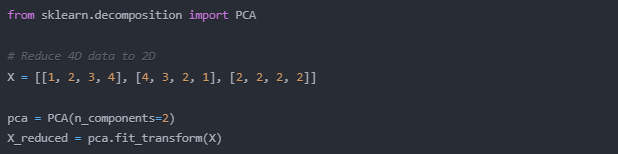


Best Used For:
- Feature extraction
- Data visualization
- Image compression
- Noise reduction


**Code implementation steps:**
**Data Analysis:**

Feature distributions
Correlation analysis
Pair plots
Box plots
3D scatter plots


**PCA Implementation:**

Data standardization
Component extraction
Variance analysis
Loading analysis


**Visualization Techniques:**

Explained variance plots
Component loading heatmaps
Biplots
2D and 3D scatter plots
Feature importance plots


**Analysis Tools:**

Dimensionality reduction
Feature importance
Component interpretation
Variance explanation

**Future things to do:**
1. Add more advanced visualization techniques?
2. Include different scaling methods?
3. Add comparison with other dimensionality reduction techniques?
4. Implement cross-validation?
5. Add more detailed component interpretation?

In [1]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

Step 1: Loading data...
Dataset Shape: (150, 6)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Sample Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  

Step 2: Exploring data...


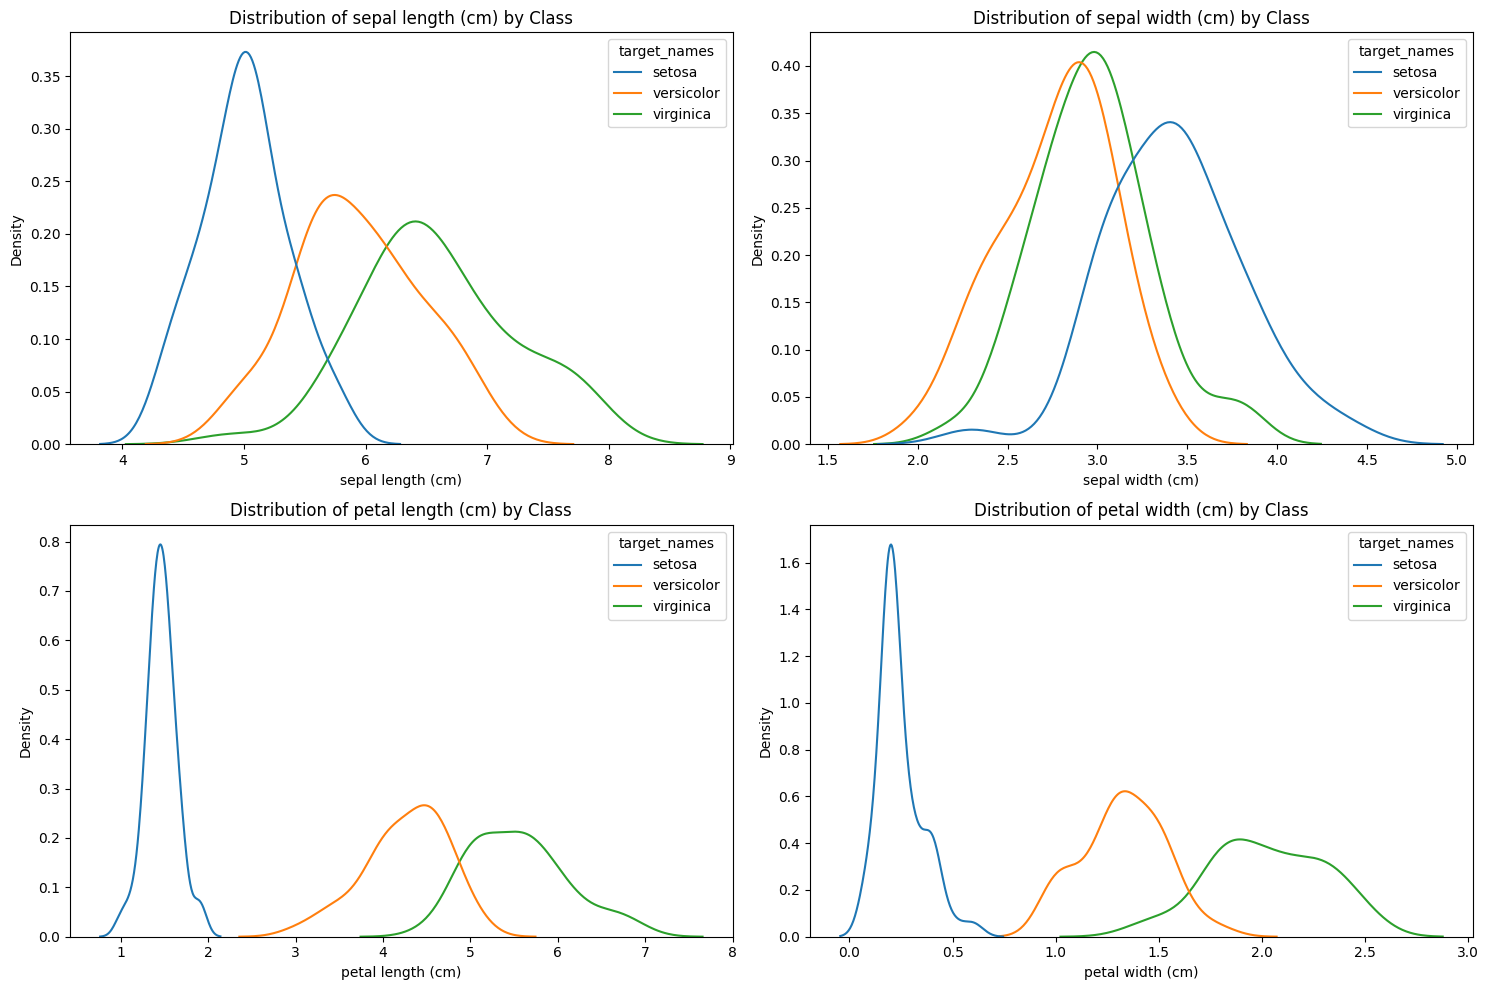

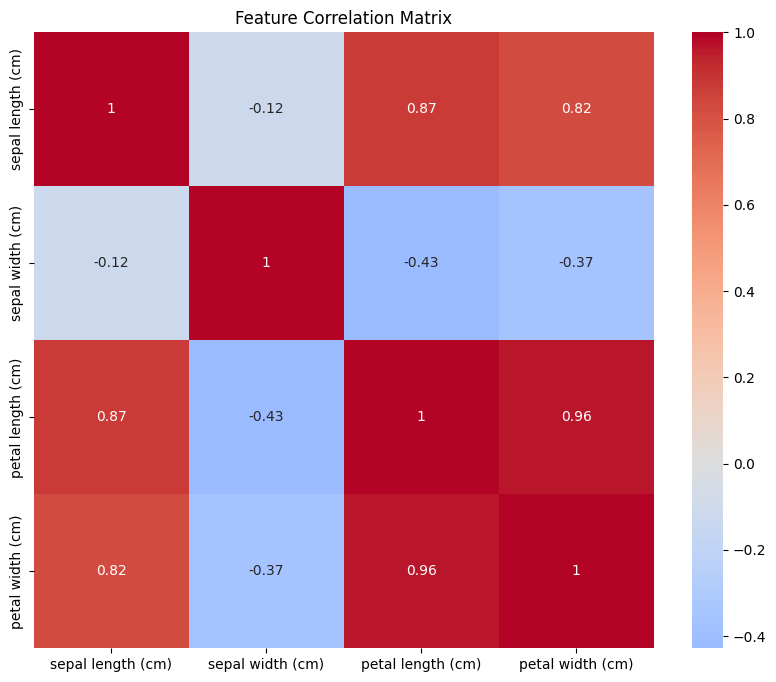

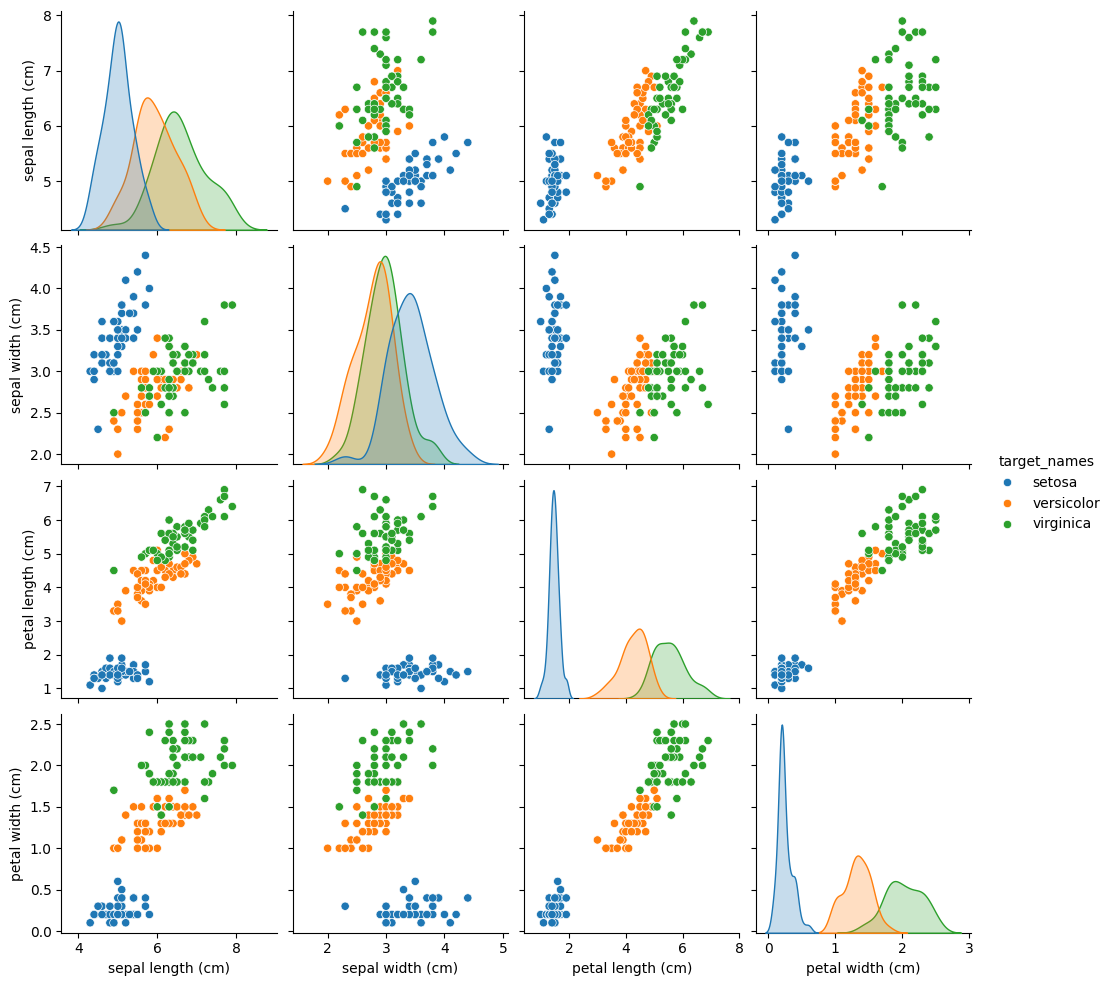

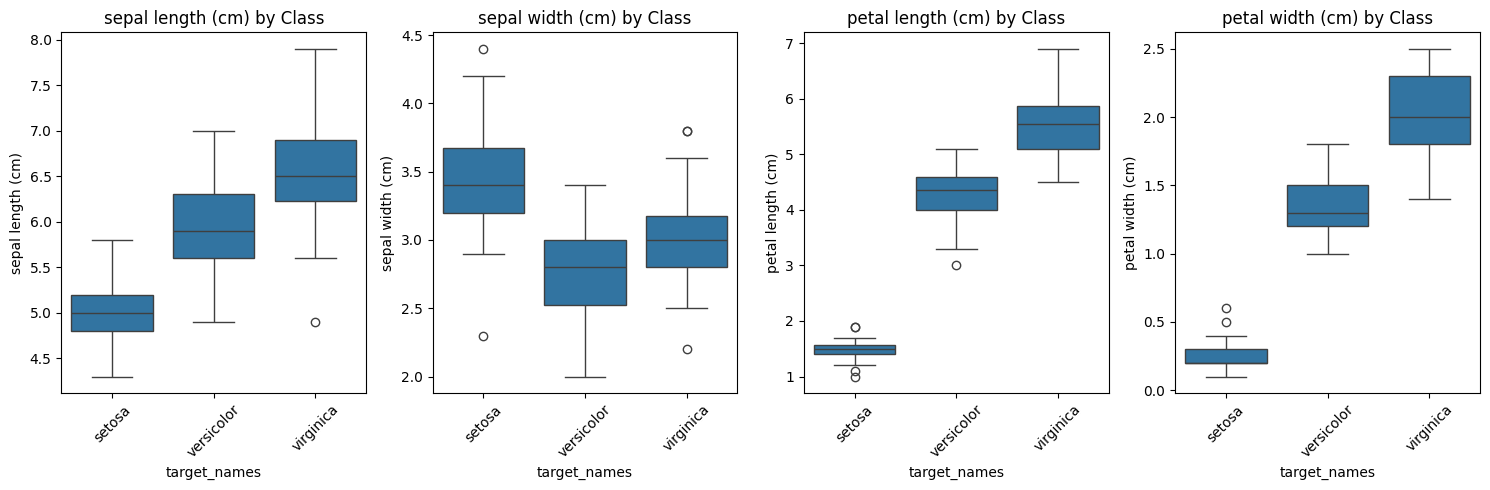


Step 3: Preparing data...

Step 4: Performing PCA...

Step 5: Analyzing components...


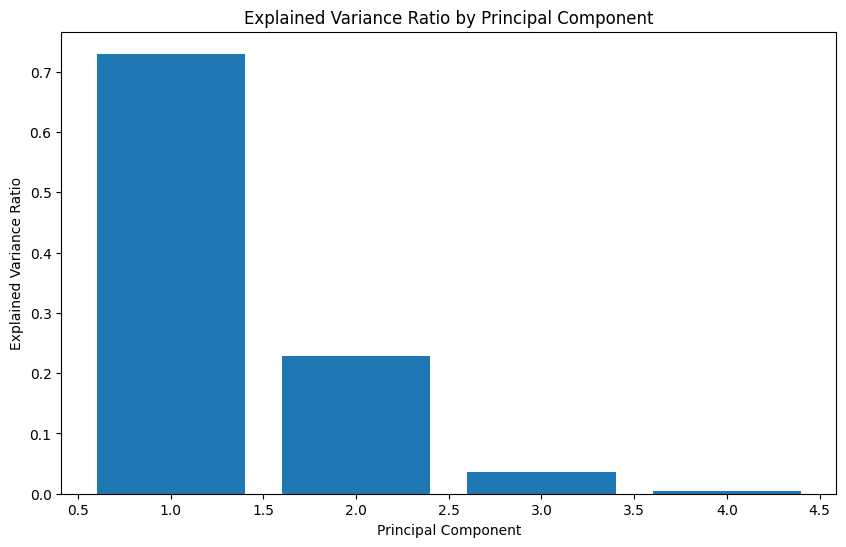

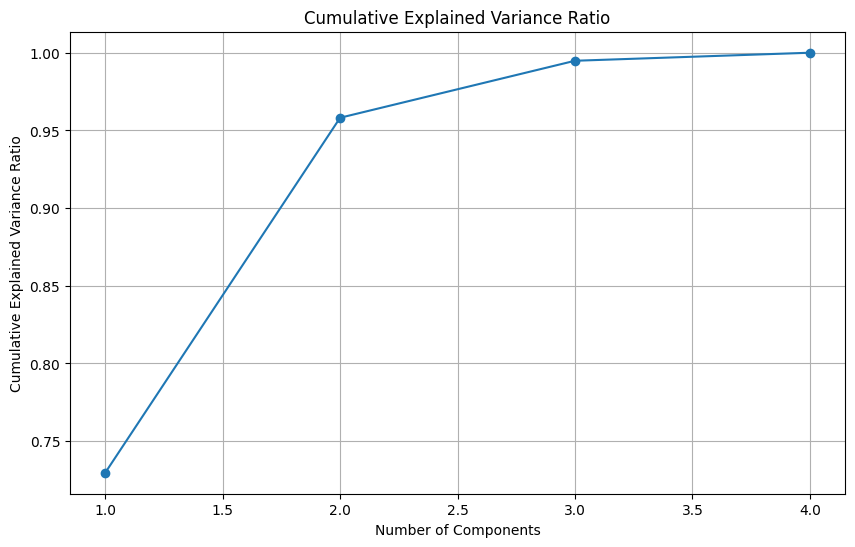

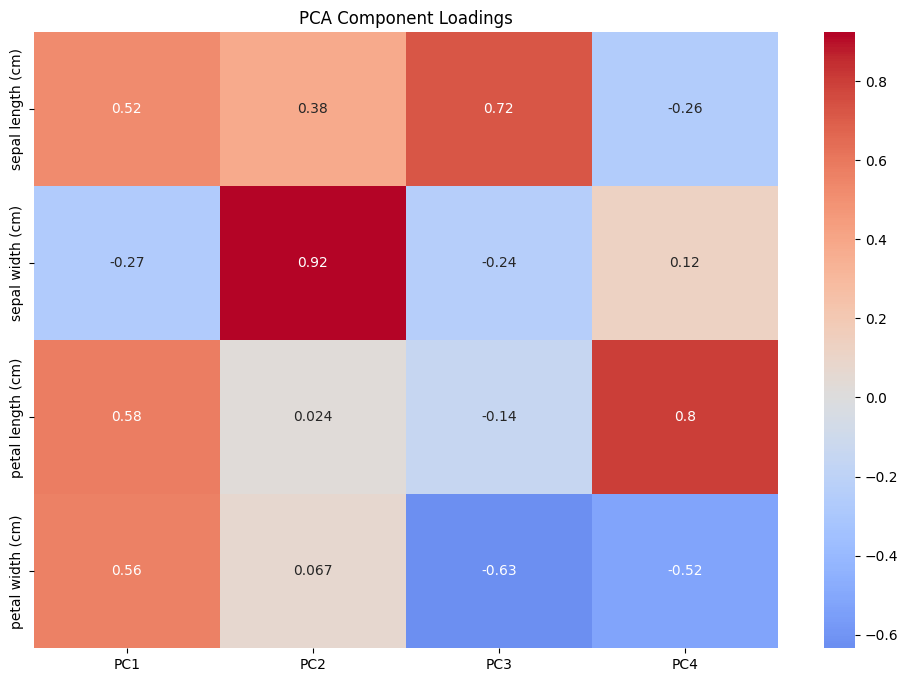


Explained Variance Ratio:
PC1: 0.7296 (73.0%)
PC2: 0.2285 (22.9%)
PC3: 0.0367 (3.7%)
PC4: 0.0052 (0.5%)
Total: 100.0%

Step 6: Visualizing PCA results...


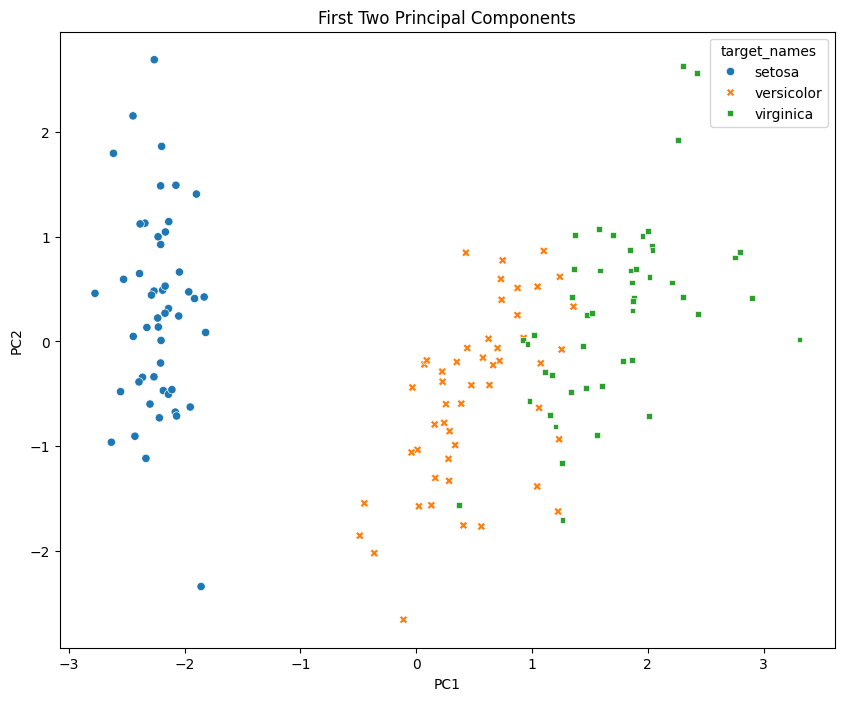

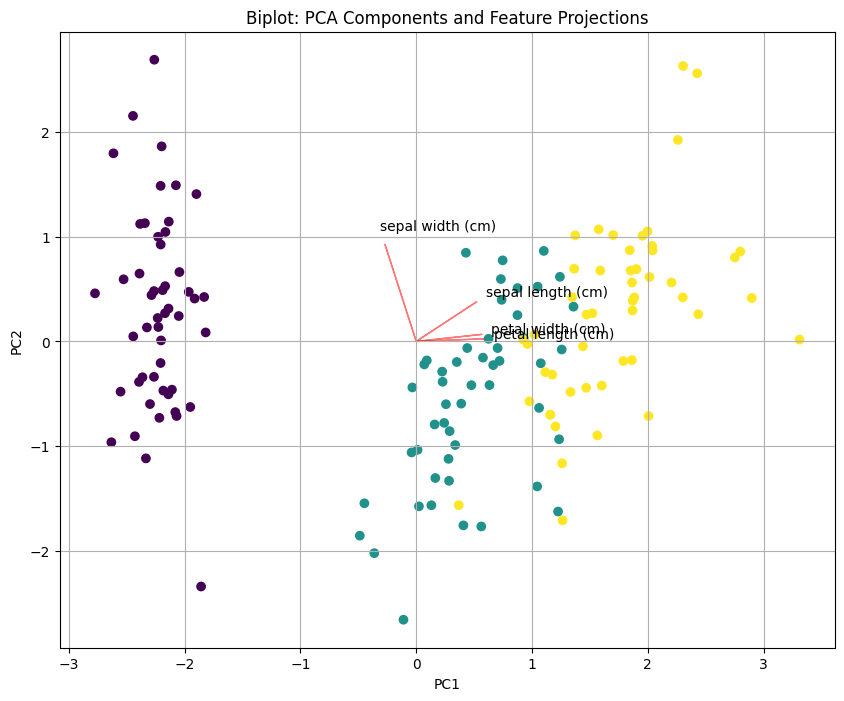


Step 7: Reducing dimensionality...

Reduced data shape: (150, 2)
Explained variance ratio: 95.8%

Step 8: Analyzing feature importance...


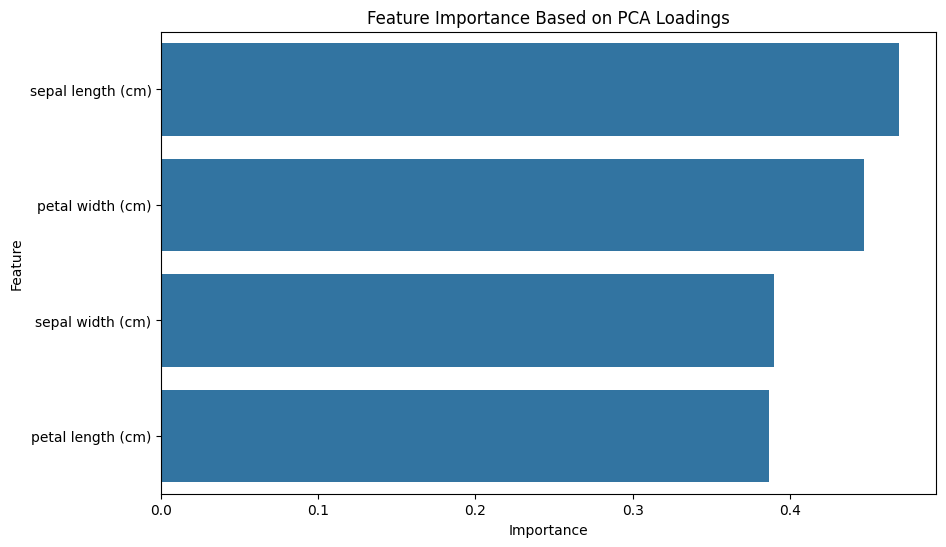


Feature Importance:
             Feature  Importance
0  sepal length (cm)    0.469834
3   petal width (cm)    0.447417
1   sepal width (cm)    0.390134
2  petal length (cm)    0.387120


In [2]:
class PCAAnalyzer:
    def __init__(self):
        """Initialize PCA Analyzer"""
        self.df = None
        self.X = None
        self.y = None
        self.X_scaled = None
        self.pca = None
        self.X_pca = None
        self.feature_names = None

    def load_data(self):
        """Load Iris Dataset"""
        # Load built-in iris dataset
        from sklearn.datasets import load_iris
        iris = load_iris()

        self.df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
        self.df['target'] = iris.target
        self.df['target_names'] = iris.target_names[iris.target]
        self.feature_names = iris.feature_names

        print("Dataset Shape:", self.df.shape)
        print("\nFeature Names:", self.feature_names)
        print("\nSample Data:")
        print(self.df.head())

        return self.df

    def explore_data(self):
        """Perform exploratory data analysis"""

        # 1. Distribution of features by class
        plt.figure(figsize=(15, 10))
        for i, feature in enumerate(self.feature_names, 1):
            plt.subplot(2, 2, i)
            sns.kdeplot(data=self.df, x=feature, hue='target_names')
            plt.title(f'Distribution of {feature} by Class')
        plt.tight_layout()
        plt.show()

        # 2. Correlation Matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df[self.feature_names].corr(),
                   annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Matrix')
        plt.show()

        # 3. Pair Plot
        sns.pairplot(self.df, hue='target_names',
                    vars=self.feature_names)
        plt.show()

        # 4. Box Plots
        plt.figure(figsize=(15, 5))
        for i, feature in enumerate(self.feature_names, 1):
            plt.subplot(1, 4, i)
            sns.boxplot(data=self.df, x='target_names', y=feature)
            plt.xticks(rotation=45)
            plt.title(f'{feature} by Class')
        plt.tight_layout()
        plt.show()

        # 5. 3D Scatter Plot
        fig = px.scatter_3d(self.df,
                           x=self.feature_names[0],
                           y=self.feature_names[1],
                           z=self.feature_names[2],
                           color='target_names',
                           title='3D Scatter Plot of First Three Features')
        fig.show()

    def prepare_data(self):
        """Prepare data for PCA"""
        # Separate features and target
        self.X = self.df[self.feature_names]
        self.y = self.df['target']

        # Scale the features
        scaler = StandardScaler()
        self.X_scaled = scaler.fit_transform(self.X)

        return self.X_scaled

    def perform_pca(self):
        """Perform PCA"""
        # Initialize and fit PCA
        self.pca = PCA()
        self.X_pca = self.pca.fit_transform(self.X_scaled)

        # Create DataFrame with PCA results
        cols = [f'PC{i+1}' for i in range(len(self.feature_names))]
        self.pca_df = pd.DataFrame(data=self.X_pca, columns=cols)
        self.pca_df['target'] = self.y
        self.pca_df['target_names'] = self.df['target_names']

        return self.pca_df

    def analyze_components(self):
        """Analyze PCA components"""

        # 1. Explained Variance Ratio
        exp_var_ratio = self.pca.explained_variance_ratio_

        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance Ratio by Principal Component')
        plt.show()

        # Cumulative explained variance
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(exp_var_ratio) + 1),
                np.cumsum(exp_var_ratio),
                marker='o')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title('Cumulative Explained Variance Ratio')
        plt.grid(True)
        plt.show()

        # 2. Component Loadings
        loadings = pd.DataFrame(
            self.pca.components_.T,
            columns=[f'PC{i+1}' for i in range(len(self.feature_names))],
            index=self.feature_names
        )

        plt.figure(figsize=(12, 8))
        sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
        plt.title('PCA Component Loadings')
        plt.show()

        # Print explained variance for each component
        print("\nExplained Variance Ratio:")
        for i, ratio in enumerate(exp_var_ratio, 1):
            print(f"PC{i}: {ratio:.4f} ({ratio*100:.1f}%)")
        print(f"Total: {sum(exp_var_ratio)*100:.1f}%")

        return loadings

    def visualize_pca_results(self):
        """Visualize PCA results"""

        # 1. 2D Scatter Plot (First two components)
        plt.figure(figsize=(10, 8))
        sns.scatterplot(data=self.pca_df, x='PC1', y='PC2',
                       hue='target_names', style='target_names')
        plt.title('First Two Principal Components')
        plt.show()

        # 2. 3D Scatter Plot (First three components)
        fig = px.scatter_3d(self.pca_df, x='PC1', y='PC2', z='PC3',
                           color='target_names',
                           title='First Three Principal Components')
        fig.show()

        # 3. Biplot
        def biplot(score, coef, labels=None):
            xs = score[:,0]
            ys = score[:,1]
            n = coef.shape[0]

            plt.figure(figsize=(10, 8))
            plt.scatter(xs, ys, c=self.y)

            for i in range(n):
                plt.arrow(0, 0, coef[i,0], coef[i,1], color='r', alpha=0.5)
                if labels is None:
                    plt.text(coef[i,0]* 1.15, coef[i,1] * 1.15, "Var"+str(i+1))
                else:
                    plt.text(coef[i,0]* 1.15, coef[i,1] * 1.15, labels[i])

            plt.xlabel("PC{}".format(1))
            plt.ylabel("PC{}".format(2))
            plt.grid()
            plt.title('Biplot: PCA Components and Feature Projections')

        # Create and show biplot
        biplot(self.X_pca[:, 0:2],
               np.transpose(self.pca.components_[0:2, :]),
               self.feature_names)
        plt.show()

    def dimensionality_reduction(self, n_components=2):
        """Reduce dimensionality to specified number of components"""
        # Perform PCA with specified number of components
        pca_reduced = PCA(n_components=n_components)
        X_reduced = pca_reduced.fit_transform(self.X_scaled)

        # Create DataFrame with reduced dimensions
        cols = [f'PC{i+1}' for i in range(n_components)]
        reduced_df = pd.DataFrame(data=X_reduced, columns=cols)
        reduced_df['target'] = self.y
        reduced_df['target_names'] = self.df['target_names']

        print(f"\nReduced data shape: {X_reduced.shape}")
        print(f"Explained variance ratio: {sum(pca_reduced.explained_variance_ratio_)*100:.1f}%")

        return reduced_df

    def feature_importance(self):
        """Analyze feature importance based on PCA loadings"""
        # Calculate absolute loadings
        abs_loadings = abs(self.pca.components_)

        # Calculate feature importance as mean absolute loading
        importance = abs_loadings.mean(axis=0)

        # Create feature importance DataFrame
        importance_df = pd.DataFrame({
            'Feature': self.feature_names,
            'Importance': importance
        }).sort_values('Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(data=importance_df, x='Importance', y='Feature')
        plt.title('Feature Importance Based on PCA Loadings')
        plt.show()

        return importance_df

def main():
    # Create instance of PCAAnalyzer
    pca_analyzer = PCAAnalyzer()

    # Step 1: Load data
    print("Step 1: Loading data...")
    pca_analyzer.load_data()

    # Step 2: Explore data
    print("\nStep 2: Exploring data...")
    pca_analyzer.explore_data()

    # Step 3: Prepare data
    print("\nStep 3: Preparing data...")
    pca_analyzer.prepare_data()

    # Step 4: Perform PCA
    print("\nStep 4: Performing PCA...")
    pca_analyzer.perform_pca()

    # Step 5: Analyze components
    print("\nStep 5: Analyzing components...")
    pca_analyzer.analyze_components()

    # Step 6: Visualize results
    print("\nStep 6: Visualizing PCA results...")
    pca_analyzer.visualize_pca_results()

    # Step 7: Perform dimensionality reduction
    print("\nStep 7: Reducing dimensionality...")
    reduced_data = pca_analyzer.dimensionality_reduction(n_components=2)

    # Step 8: Analyze feature importance
    print("\nStep 8: Analyzing feature importance...")
    feature_importance = pca_analyzer.feature_importance()
    print("\nFeature Importance:")
    print(feature_importance)

if __name__ == "__main__":
    main()